In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime
from scipy import signal
from scipy.signal import butter, lfilter, freqz
import pywt
from scipy import integrate
import statistics
from scipy import stats
import math 
from scipy.signal import find_peaks, peak_prominences
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle

warnings.filterwarnings("ignore")

In [2]:
#raw_data=pd.read_csv('NP_raw_data_stream.csv',header=None)
raw_data=pd.read_csv('segmented.csv',header=None)

In [3]:
raw_data.head()

,0,1,2,3,4,5,6
0,-0.990195,-0.990195,9.656150,2.369412,1.876537,14.166640,2.295412
1,-1.027044,-1.027044,9.657468,2.388235,1.366715,14.981388,2.715140
2,-0.999266,-0.999266,9.657468,2.388235,0.948227,15.644277,2.922422
3,-0.953158,-0.953158,9.704694,2.369412,0.654612,15.796896,3.155916
4,-0.925380,-0.925380,9.733820,2.369412,0.886240,15.921266,2.954240


time=raw_data['Time']
data_accx_test=raw_data['ACCX']
data_accy_test=raw_data['ACCY']
data_accz_test=raw_data['ACCZ']
data_gyrox_test=raw_data['GYROX']
data_agyroy_test=raw_data['GYROY']
data_gyroz_test=raw_data['GYROZ']

In [4]:
data_accx_test=raw_data.iloc[:,1]
data_accy_test=raw_data.iloc[:,2]
data_accz_test=raw_data.iloc[:,3]
data_gyrox_test=raw_data.iloc[:,4]
data_gyroy_test=raw_data.iloc[:,5]
data_gyroz_test=raw_data.iloc[:,6]

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
order = 4
fs = 100.0       
cutoff = 20.0  

b, a = butter_lowpass(cutoff, fs, order)

data_accx_test = butter_lowpass_filter(data_accx_test, cutoff, fs, order)
data_accy_test = butter_lowpass_filter(data_accy_test, cutoff, fs, order)
data_accz_test = butter_lowpass_filter(data_accz_test, cutoff, fs, order)

data_gyrox_test = butter_lowpass_filter(data_gyrox_test, cutoff, fs, order)
data_gyroy_test = butter_lowpass_filter(data_gyroy_test, cutoff, fs, order)
data_gyroz_test = butter_lowpass_filter(data_gyroz_test, cutoff, fs, order)




In [5]:
len(data_accy_test)

21101

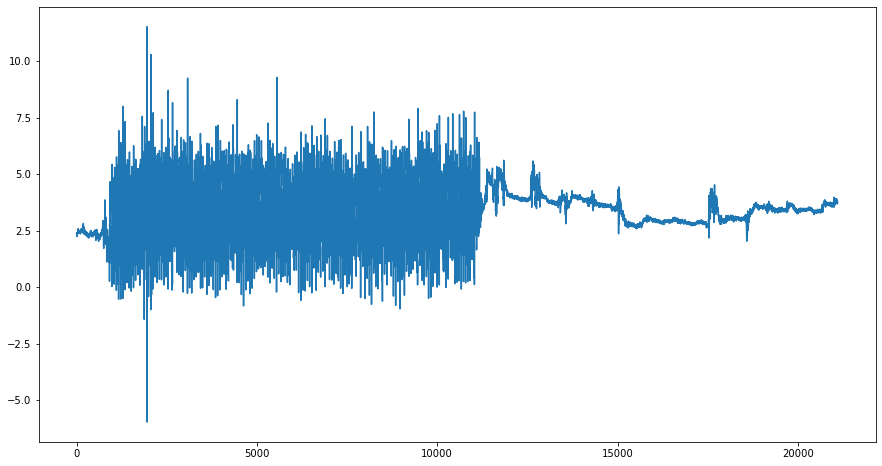

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(data_accz_test)

In [7]:
row_number=round(len(data_accx_test)/250)
N=len(data_accx_test)-(row_number*250)


In [ ]:

data_accx_test.drop(data_accx_test.tail(N).index,inplace=True)
data_accy_test.drop(data_accx_test.tail(N).index,inplace=True)
data_accz_test.drop(data_accx_test.tail(N).index,inplace=True)
data_gyrox_test.drop(data_gyrox_test.tail(N).index,inplace=True)
data_gyroy_test.drop(data_gyroy_test.tail(N).index,inplace=True)
data_gyroz_test.drop(data_gyroz_test.tail(N).index,inplace=True)



In [ ]:
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())
data_accx_test=list(chunk(data_accx_test, 250))
data_accy_test=list(chunk(data_accy_test, 250))
data_accz_test=list(chunk(data_accz_test, 250))
data_gyrox_test=list(chunk(data_gyrox_test, 250))
data_gyroy_test=list(chunk(data_gyroy_test, 250))
data_gyroz_test=list(chunk(data_gyroz_test, 250))


In [ ]:
data_accx_test=pd.DataFrame(data_accx_test)
data_accy_test=pd.DataFrame(data_accy_test)
data_accz_test=pd.DataFrame(data_accz_test)
data_gyrox_test=pd.DataFrame(data_gyrox_test)
data_gyroy_test=pd.DataFrame(data_gyroy_test)
data_gyroz_test=pd.DataFrame(data_gyroz_test)

#y=y.T

data_accx_test.to_csv('accx_array.csv')
data_accy_test.to_csv('accy_array.csv')
data_accz_test.to_csv('accz_array.csv')
data_gyrox_test.to_csv('gyrox_array.csv')
data_gyroy_test.to_csv('gyroy_array.csv')
data_gyroz_test.to_csv('gyroz_array.csv')

In [ ]:
an_array_test = np.full([len(data_accx_test),24], None)

In [ ]:
#Test
for i in range(0,len(data_accx_test-1)):
    an_array_test[i,0]= statistics.mean(data_accx_test.iloc[i])
    an_array_test[i,1]= statistics.mean(data_accy_test.iloc[i])
    an_array_test[i,2]= statistics.mean(data_accz_test.iloc[i])
    an_array_test[i,3]= statistics.mean(data_gyrox_test.iloc[i])
    an_array_test[i,4]= statistics.mean(data_gyroy_test.iloc[i])
    an_array_test[i,5]= statistics.mean(data_gyroz_test.iloc[i])
    an_array_test[i,6]= statistics.stdev(data_accx_test.iloc[i])
    an_array_test[i,7]= statistics.stdev(data_accy_test.iloc[i])
    an_array_test[i,8]= statistics.stdev(data_accz_test.iloc[i])
    an_array_test[i,9]= statistics.stdev(data_gyrox_test.iloc[i])
    an_array_test[i,10]= statistics.stdev(data_gyroy_test.iloc[i])
    an_array_test[i,11]= statistics.stdev(data_gyroz_test.iloc[i])
    an_array_test[i,12]= np.sum(data_accx_test.iloc[i])
    an_array_test[i,13]= np.sum(data_accy_test.iloc[i])
    an_array_test[i,14]= np.sum(data_accz_test.iloc[i])
    an_array_test[i,15]= np.sum(data_gyrox_test.iloc[i])
    an_array_test[i,16]= np.sum(data_gyroy_test.iloc[i])
    an_array_test[i,17]= np.sum(data_gyroz_test.iloc[i])
    an_array_test[i,18]= statistics.variance(data_accx_test.iloc[i])
    an_array_test[i,19]= statistics.variance(data_accy_test.iloc[i])
    an_array_test[i,20]= statistics.variance(data_accz_test.iloc[i])
    an_array_test[i,21]= statistics.variance(data_gyrox_test.iloc[i])
    an_array_test[i,22]= statistics.variance(data_gyroy_test.iloc[i])
    an_array_test[i,23]= statistics.variance(data_gyroz_test.iloc[i])
    

In [ ]:
X_final_test=an_array_test

In [ ]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
Xnew = X_final_test
ynew = loaded_model.predict(Xnew)

In [ ]:
ynew

In [ ]:
ynew = pd.DataFrame(ynew)
ynew.to_csv('ynew.csv')

In [ ]:
len(ynew)

import matplotlib.pyplot as plt
#%matplotlib notebook 
data_accx_test=raw_data.iloc[:,1]
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(data_accx_test)


In [ ]:
type(ynew)
ynew.columns=['A']
ynew=ynew['A'] 


In [ ]:
locations=[]
counter_walking=0;
counter_not_walking=0
for i in range(0,len(ynew-1)):
    if ynew[i]==1:
        print('bout detected',i)
        locations.append(i)
        counter_walking=counter_walking+1
    else:
        print('bout could not detected',i)
        counter_not_walking=counter_not_walking+1
       
        
       

In [ ]:
locations

In [ ]:
start=locations[0]
end=[]
i=start
for i in range(start,len(ynew-1)):
    if locations[i]+1==locations[i+1]:
        end=i+1
    else:
        break


In [ ]:
ynew[0]

In [ ]:

    if ynew[0]==0:
        changes=np.where(np.diff(ynew,prepend=np.nan))[0]
        walking_bouts=range(len(changes))
        

In [ ]:
changes

In [ ]:
walking_intervals=[]
for i in range(0,len(changes)-1):
    walking_intervals.append(changes[i+1])

In [ ]:
walking_intervals

In [ ]:
start=[]
stop=[]

for i in range(0,len(walking_intervals)):
       if (i % 2) == 0:  
            start.append(walking_intervals[i])
       else:
            stop.append(walking_intervals[i]+1)
       
            

In [ ]:
walking_intervals=[]
walking_intervals.append(changes[i+1])

In [ ]:
data_accz_test=raw_data.iloc[:,3]
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(data_accz_test[750:11500])

In [ ]:
start

In [ ]:
stop

In [ ]:


#s_data_accx_test=data_accx_test[start[0]*250:(stop[0]-1)*250]
#s_data_accy_test=data_accy_test[start[0]*250:stop[0]*250]
#s_data_accz_test=data_accz_test[start[0]*250:stop[0]*250]
#s_data_gyrox_test=data_gyrox_test[start[0]*250:stop[0]*250]
#s_data_gyroy_test=data_gyroy_test[start[0]*250:stop[0]*250]
#s_data_gyroz_test=data_gyroz_test[start[0]*250:stop[0]*250]


In [ ]:
array_to_return=[]
for i in range(0,len(start)-1):
    array_to_return.append(start[i])
    array_to_return.append(stop[i])




In [ ]:
#delete last element of start and stop
if len(start)> len(stop):
       start.pop()

In [ ]:
if len(start)< len(stop):
       stop.pop()

#merging detected gait bouts
array_to_return = pd.DataFrame({
    'start':start ,
    'stop': stop})
array_to_return = pd.DataFrame(array_to_return)
array_to_return.to_csv('array_to_return.csv')

In [ ]:
#for each 2.5 seconds
array_to_return = pd.DataFrame({
    'start':locations})
array_to_return = pd.DataFrame(array_to_return)
array_to_return.to_csv('array_to_return.csv')

In [ ]:
number=[]
StepT=[]
StanceT=[]
StrideT=[]
SwingT=[]


In [ ]:
for i in range(5,20):
  
    %store i
    %run locations_based_segmentation.ipynb
    StepT.append(StepTime)
    StanceT.append(StanceTime)
    StrideT.append(StrideTime)
    SwingT.append(SwingTime) 
    number.append(X)


In [ ]:
for k in range(0,len(StepT)-1):
    if StepT[k]>1.0 or StepT[k]<0.3:
        StepT[k]=0
for l in range(0,len(StrideT)-1):
    if StrideT[l]>1.5 or StrideT[l]<0.3:
        StrideT[l]=0
for m in range(0,len(StanceT)-1):
    if StanceT[m]>1.0 or StanceT[m]<0.3:
        StanceT[m]=0
for n in range(0,len(SwingT)-1):
    if SwingT[n]>1.0 or SwingT[n]<0.1:
        SwingT[n]=0      

In [ ]:
StepT = [i for i in StepT if i != 0]
StrideT = [i for i in StrideT if i != 0]
StanceT = [i for i in StanceT if i != 0]
SwingT = [i for i in SwingT if i != 0]

In [ ]:
Results = {'Number of walking bouts':number ,'Step Times':StepT , 'Stride Times':StrideT , 'Stance Times':StanceT , 
           'Swing Times':SwingT}
Results = pd.DataFrame.from_dict(Results, orient='index')
Results = Results.transpose()
Results.to_csv('Results.csv')


In [ ]:
def Average(value):
    return sum(value) / len(value)

In [ ]:
def Sum(value):
    return sum(value)

In [ ]:
Sum.number=Average(number)
Average.StepT=Average(StepT)
Average.StrideT=Average(StrideT)
Average.StanceT=Average(StanceT)
Average.SwingT=Average(SwingT)

In [ ]:
visual = pd.DataFrame({'Parameters':[ 'Stride Time','Step Time', 'Stance Time', 'Swing Time'], 'value':[Average.StrideT, Average.StepT,
                                                                                                      Average.StanceT,Average.SwingT]})
ax = visual.plot.bar(x='Parameters', y='value', rot=0)

In [ ]:
graph= [counter_walking,counter_not_walking]
mylabels = ["bout detected", "No bout detected"]
myexplode = [0.1, 0]
plt.pie(graph,labels = mylabels, startangle = 90, explode = myexplode)
plt.show()


In [1]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [3]:
import anvil.server

anvil.server.connect("AZZVPTDKVWUOK25IP5IZI5NC-PGDLH5E2V72RT4ZO")

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Default environment" as SERVER


In [4]:
@anvil.server.callable
def say_hello_j(name):
    print(f"greetings{name}")
    return f"Hello from Jupyter, [name]"